## Brian Seggebruch - 873408239 - Assignment 4

In [ ]:
# Brian Seggebruch - 873408239 - Assignment 4

In [24]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Fashion MNIST

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

In [10]:
class_names[y_train[0]]

'Coat'

Build our NN with 2 hidden layers using the Rectified Linear Unit activation function, and one output layer using the Softmax activation function

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))         
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compile the model using the Sparse Categorical Cross-Entropy loss function and Stochastic Gradient Descent as our optimizer, and setting "accuracy" as our metric (how many were correctly classified)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy"
    ,optimizer="sgd"
    ,metrics=["accuracy"]
)

Exploring the historic accuracy and loss of our model

In [15]:
history = model.fit(
    X_train, y_train, epochs=30
    ,validation_data=(X_valid, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.7305 - acc: 0.7603 - val_loss: 0.5115 - val_acc: 0.8330
Epoch 2/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.4929 - acc: 0.8283 - val_loss: 0.4666 - val_acc: 0.8380
Epoch 3/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.4461 - acc: 0.8437 - val_loss: 0.4210 - val_acc: 0.8536
Epoch 4/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.4182 - acc: 0.8533 - val_loss: 0.4316 - val_acc: 0.8454
Epoch 5/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.3989 - acc: 0.8601 - val_loss: 0.4019 - val_acc: 0.8546
Epoch 6/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.3828 - acc: 0.8659 - val_loss: 0.3717 - val_acc: 0.8716
Epoch 7/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.3700 - acc: 0.8692 - val_loss: 0.3

Visualizing the loss function, as well as the accuracy of our model

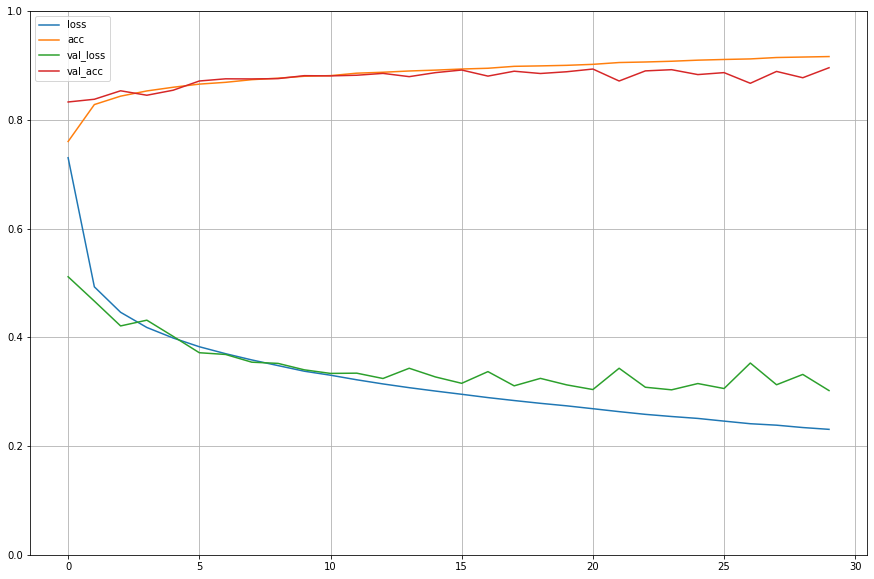

In [19]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();

We can see from the below the model achieves an accuracy of ~84% on the test dataset

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 17us/sample - loss: 73.3226 - acc: 0.8407


[73.32260058033467, 0.8407]

Predicting the first 3 values of our test data...

In [21]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Our model has classified the first three itmes as (9, 2, 1), respectively, meaning Ankle boot, Pullover, and Trouser

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Looking at the actual 3 values of the test data, we see that in fact our predictions were correct!

In [26]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

### MNIST Digits

In [34]:
digits_mnist = keras.datasets.mnist

Preparing our test/train/validate sets

In [35]:
(X_train_full, y_train_full), (X_test, y_test) = digits_mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [37]:
X_train_full.shape

(60000, 28, 28)

In [38]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Building our 2 hidden-layer NN

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))         
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compiling and fitting our 2 layer NN

In [42]:
model.compile(
    loss="sparse_categorical_crossentropy"
    ,optimizer="sgd"
    ,metrics=["accuracy"]
)

In [43]:
history = model.fit(
    X_train, y_train, epochs=30
    ,validation_data=(X_valid, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.6207 - acc: 0.8417 - val_loss: 0.3114 - val_acc: 0.9118
Epoch 2/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.2902 - acc: 0.9176 - val_loss: 0.2403 - val_acc: 0.9360
Epoch 3/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.2366 - acc: 0.9319 - val_loss: 0.2051 - val_acc: 0.9424
Epoch 4/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.2017 - acc: 0.9422 - val_loss: 0.1833 - val_acc: 0.9466
Epoch 5/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.1761 - acc: 0.9493 - val_loss: 0.1610 - val_acc: 0.9554
Epoch 6/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.1556 - acc: 0.9560 - val_loss: 0.1477 - val_acc: 0.9614
Epoch 7/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.1390 - acc: 0.9608 - val_loss: 0.1

Visualizing the loss and accuracy of our model

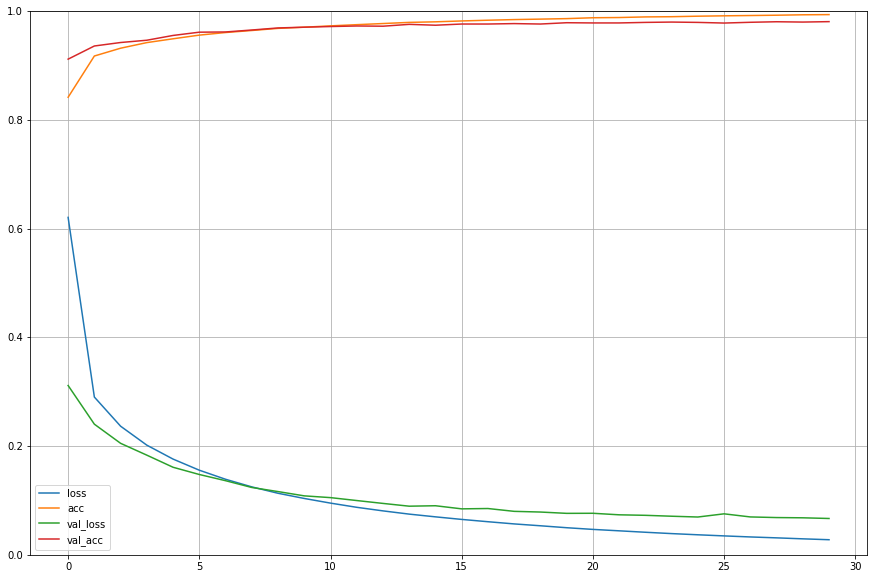

In [44]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();

Looking at the accuracy of our model, we see, after training, an accuracy of ~97%!

In [45]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/sample - loss: 13.2209 - acc: 0.9761


[13.220874617290496, 0.9761]

Using our trained model to predict the first 3 values of the test data (for demonstration), we see that our model classifies the first 3 values as the digits 7, 2, and 1, with 100% certainty.

In [46]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Again, shown with the first 3 values of our test data, our model has correctly predicted the digits!

In [47]:
y_test[:3]

array([7, 2, 1], dtype=uint8)